## DEEP LEARNING CNN FOR FASHION MNIST DATASET
---
* Using PyTorch
* Reimplementation of : SOURCE{https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/}

In [1]:
import os
import sys

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms

from models import BaselineCNN, LeNet5, ResNetMini, DenseNetTiny, MobileNetLite
from utils import EarlyStopper, train_one_epoch, evaluate, accuracy_score, visualise_fashion_mnist

In [2]:
# import dataset - fashion MNIST

# Specify transforms
transform = transforms.Compose([
    # transforms.Resize(256),         # Up scale image to 256 x 256  NOTE WAY TOO COMPUTATIONALLY INTENSIVE
    transforms.ToTensor()           # Convert from image.PIL to tensors
])
# NOTE Images are left as 1 channel grayscale images for now!

download = not os.path.exists('./data/FashionMNIST')
train_dataset = torchvision.datasets.FashionMNIST(root='./data/', train=True, download=download, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data/', train=False, download=download, transform=transform)

In [3]:
# Constants
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
NUM_SAMPLES = len(train_dataset)
EPOCHS = 100
LEARNING_RATE = 0.001
PATIENCE = 5
BATCH_SIZE = 8

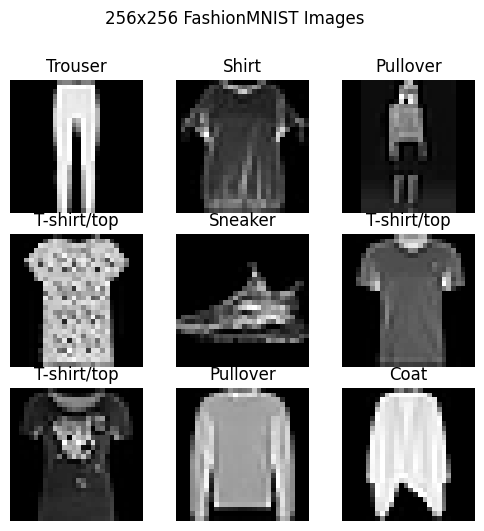

In [4]:
# test sample
visualise_fashion_mnist(train_dataset)

In [5]:
# Setting up data loaders
train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

# Check that the dataloader works
images, labels = next(iter(train_dataloader))
sample_image, sample_label = images[0], labels[1]
sample_image.shape, sample_label

(torch.Size([1, 28, 28]), tensor(9))

In [6]:
# baseline_cnn = BaselineCNN()
# optimizer = torch.optim.Adam(params=baseline_cnn.parameters(), lr=LEARNING_RATE)
# loss_fn = nn.CrossEntropyLoss()
# early_stopper = EarlyStopper(patience = PATIENCE)

# baseline_cnn = baseline_cnn.to(device)

# # Train Loop
# train_losses, train_accuracies = [], []
# test_losses, test_accuracies = [], []

# for epoch in range(EPOCHS):
#     train_loss, train_acc = train_one_epoch(baseline_cnn, train_dataloader, optimizer, loss_fn, device)
#     test_loss, test_acc = evaluate(baseline_cnn, test_dataloader, loss_fn, device)

#     train_losses.append(train_loss)
#     train_accuracies.append(train_acc)
#     test_losses.append(test_loss)
#     test_accuracies.append(test_accuracies)

#     print(
#         f"Epoch {epoch+1:3d}  " +\
#         f"Train Loss: {train_loss:.6f}, Train Acc: {train_acc:.4f}.  " +\
#         f"Test Loss:  {test_loss:.6f},  Test Acc:  {test_acc:.4f}."
#     )

#     if early_stopper.check_stop(test_loss):
#         print(f"Early Stopping at epoch {epoch+1}. Patience={PATIENCE}")
#         break

# # Epoch   1  Train Loss: 0.672830, Train Acc: 0.7753.  Test Loss:  0.425527,  Test Acc:  0.8485.
# # Epoch   2  Train Loss: 0.409109, Train Acc: 0.8532.  Test Loss:  0.374019,  Test Acc:  0.8648.
# # Epoch   3  Train Loss: 0.361316, Train Acc: 0.8689.  Test Loss:  0.371056,  Test Acc:  0.8646.
# # Epoch   4  Train Loss: 0.336831, Train Acc: 0.8790.  Test Loss:  0.332246,  Test Acc:  0.8755.
# # Epoch   5  Train Loss: 0.319079, Train Acc: 0.8863.  Test Loss:  0.324331,  Test Acc:  0.8821.
# # Epoch   6  Train Loss: 0.312263, Train Acc: 0.8886.  Test Loss:  0.310936,  Test Acc:  0.8872.
# # Epoch   7  Train Loss: 0.300623, Train Acc: 0.8913.  Test Loss:  0.300646,  Test Acc:  0.8895.
# # Epoch   8  Train Loss: 0.293395, Train Acc: 0.8941.  Test Loss:  0.307762,  Test Acc:  0.8923.
# # Epoch   9  Train Loss: 0.288128, Train Acc: 0.8961.  Test Loss:  0.297553,  Test Acc:  0.8914.
# # Epoch  10  Train Loss: 0.282518, Train Acc: 0.8980.  Test Loss:  0.293775,  Test Acc:  0.8953.
# # Epoch  11  Train Loss: 0.277642, Train Acc: 0.9000.  Test Loss:  0.350641,  Test Acc:  0.8743.
# # Epoch  12  Train Loss: 0.271959, Train Acc: 0.9011.  Test Loss:  0.306291,  Test Acc:  0.8888.
# # Epoch  13  Train Loss: 0.266879, Train Acc: 0.9031.  Test Loss:  0.289654,  Test Acc:  0.8972.
# # Epoch  14  Train Loss: 0.265267, Train Acc: 0.9039.  Test Loss:  0.298212,  Test Acc:  0.8917.
# # Epoch  15  Train Loss: 0.263267, Train Acc: 0.9038.  Test Loss:  0.288281,  Test Acc:  0.8951.
# # Epoch  16  Train Loss: 0.260103, Train Acc: 0.9060.  Test Loss:  0.285222,  Test Acc:  0.9000.
# # Epoch  17  Train Loss: 0.257537, Train Acc: 0.9076.  Test Loss:  0.283695,  Test Acc:  0.8970.
# # Epoch  18  Train Loss: 0.254901, Train Acc: 0.9069.  Test Loss:  0.280916,  Test Acc:  0.8991.
# # Epoch  19  Train Loss: 0.252555, Train Acc: 0.9068.  Test Loss:  0.285355,  Test Acc:  0.8966.
# # Epoch  20  Train Loss: 0.253721, Train Acc: 0.9081.  Test Loss:  0.284662,  Test Acc:  0.9004.
# # Epoch  21  Train Loss: 0.247844, Train Acc: 0.9099.  Test Loss:  0.278970,  Test Acc:  0.9035.
# # Epoch  22  Train Loss: 0.246171, Train Acc: 0.9112.  Test Loss:  0.283949,  Test Acc:  0.8990.
# # Epoch  23  Train Loss: 0.244352, Train Acc: 0.9125.  Test Loss:  0.278285,  Test Acc:  0.8986.
# # Epoch  24  Train Loss: 0.241530, Train Acc: 0.9124.  Test Loss:  0.277857,  Test Acc:  0.9026.
# # Epoch  25  Train Loss: 0.241438, Train Acc: 0.9112.  Test Loss:  0.296647,  Test Acc:  0.8938.
# # Epoch  26  Train Loss: 0.238500, Train Acc: 0.9129.  Test Loss:  0.272186,  Test Acc:  0.9056.
# # Epoch  27  Train Loss: 0.237991, Train Acc: 0.9138.  Test Loss:  0.283859,  Test Acc:  0.8990.
# # Epoch  28  Train Loss: 0.237850, Train Acc: 0.9137.  Test Loss:  0.292608,  Test Acc:  0.8941.
# # Epoch  29  Train Loss: 0.233117, Train Acc: 0.9150.  Test Loss:  0.277755,  Test Acc:  0.9016.
# # Epoch  30  Train Loss: 0.233833, Train Acc: 0.9145.  Test Loss:  0.285353,  Test Acc:  0.8990.
# # ... Kernel Crashed.

In [7]:
# lenet5 = LeNet5()
# optimizer = torch.optim.Adam(params=lenet5.parameters(), lr=LEARNING_RATE)
# loss_fn = nn.CrossEntropyLoss()
# early_stopper = EarlyStopper(patience=PATIENCE)

# train_losses, train_accuracies = [], []
# test_losses, test_accuracies = [], []

# for epoch in range(EPOCHS):
#     train_loss, train_acc = train_one_epoch(lenet5, train_dataloader, optimizer, loss_fn, device)
#     test_loss, test_acc = evaluate(lenet5, test_dataloader, loss_fn, device)

#     train_losses.append(train_loss)
#     train_accuracies.append(train_acc)
#     test_losses.append(test_loss)
#     test_accuracies.append(test_acc)

#     print(
#         f"Epoch {epoch+1:3d}  " +\
#         f"Train Loss: {train_loss:.6f}, Train Acc: {train_acc:.4f}.  " +\
#         f"Test Loss:  {test_loss:.6f},  Test Acc:  {test_acc:.4f}."
#     )

#     if early_stopper.check_stop(test_loss):
#         print(f"Early Stopping at epoch {epoch+1}. Patience={PATIENCE}")
#         break

# # Epoch   1  Train Loss: 0.617036, Train Acc: 0.7734.  Test Loss:  0.475916,  Test Acc:  0.8242.
# # Epoch   2  Train Loss: 0.407383, Train Acc: 0.8509.  Test Loss:  0.401947,  Test Acc:  0.8511.
# # Epoch   3  Train Loss: 0.359708, Train Acc: 0.8679.  Test Loss:  0.377013,  Test Acc:  0.8602.
# # Epoch   4  Train Loss: 0.329120, Train Acc: 0.8782.  Test Loss:  0.360158,  Test Acc:  0.8681.
# # Epoch   5  Train Loss: 0.307845, Train Acc: 0.8850.  Test Loss:  0.351220,  Test Acc:  0.8680.
# # Epoch   6  Train Loss: 0.292151, Train Acc: 0.8908.  Test Loss:  0.330332,  Test Acc:  0.8796.
# # Epoch   7  Train Loss: 0.278027, Train Acc: 0.8966.  Test Loss:  0.318775,  Test Acc:  0.8812.
# # Epoch   8  Train Loss: 0.266045, Train Acc: 0.8992.  Test Loss:  0.319650,  Test Acc:  0.8834.
# # Epoch   9  Train Loss: 0.253291, Train Acc: 0.9055.  Test Loss:  0.312250,  Test Acc:  0.8861.
# # Epoch  10  Train Loss: 0.244499, Train Acc: 0.9083.  Test Loss:  0.310165,  Test Acc:  0.8879.
# # Epoch  11  Train Loss: 0.234772, Train Acc: 0.9120.  Test Loss:  0.313445,  Test Acc:  0.8860.
# # Epoch  12  Train Loss: 0.227049, Train Acc: 0.9145.  Test Loss:  0.312452,  Test Acc:  0.8857.
# # Epoch  13  Train Loss: 0.217189, Train Acc: 0.9182.  Test Loss:  0.315821,  Test Acc:  0.8835.
# # Epoch  14  Train Loss: 0.207690, Train Acc: 0.9221.  Test Loss:  0.301020,  Test Acc:  0.8944.
# # Epoch  15  Train Loss: 0.201140, Train Acc: 0.9254.  Test Loss:  0.315052,  Test Acc:  0.8906.
# # Epoch  16  Train Loss: 0.194848, Train Acc: 0.9270.  Test Loss:  0.303302,  Test Acc:  0.8938.
# # Epoch  17  Train Loss: 0.186098, Train Acc: 0.9308.  Test Loss:  0.308571,  Test Acc:  0.8950.
# # Epoch  18  Train Loss: 0.181506, Train Acc: 0.9323.  Test Loss:  0.313836,  Test Acc:  0.8940.
# # Epoch  19  Train Loss: 0.173668, Train Acc: 0.9349.  Test Loss:  0.300721,  Test Acc:  0.8967.
# # Epoch  20  Train Loss: 0.167530, Train Acc: 0.9378.  Test Loss:  0.310504,  Test Acc:  0.8960.
# # Epoch  21  Train Loss: 0.161487, Train Acc: 0.9395.  Test Loss:  0.311479,  Test Acc:  0.8981.
# # Epoch  22  Train Loss: 0.156894, Train Acc: 0.9413.  Test Loss:  0.328135,  Test Acc:  0.8901.
# # Epoch  23  Train Loss: 0.148949, Train Acc: 0.9448.  Test Loss:  0.315975,  Test Acc:  0.8959.
# # Epoch  24  Train Loss: 0.142245, Train Acc: 0.9474.  Test Loss:  0.339507,  Test Acc:  0.8879.
# # Early Stopping at epoch 24. Patience=5
# # 3m 57.6s

In [8]:
# resnet_mini = ResNetMini(base_channels=4)  # Drastically lowered for computational efficiency while developing
# optimizer = torch.optim.Adam(params=resnet_mini.parameters(), lr=LEARNING_RATE)
# loss_fn = nn.CrossEntropyLoss()
# early_stopper = EarlyStopper(patience=PATIENCE)

# train_losses, train_accuracies = [], []
# test_losses, test_accuracies = [], []

# # Train loop
# for epoch in range(EPOCHS):
#     train_loss, train_acc = train_one_epoch(resnet_mini, train_dataloader, optimizer, loss_fn, device)
#     test_loss, test_acc = evaluate(resnet_mini, train_dataloader, loss_fn, device)

#     train_losses.append(train_loss)
#     train_accuracies.append(train_acc)
#     test_losses.append(test_loss)
#     test_accuracies.append(test_acc)

#     print(
#         f"Epoch {epoch+1:3d}  " +\
#         f"Train Loss: {train_loss:.6f}, Train Acc: {train_acc:.4f}.  " +\
#         f"Test Loss:  {test_loss:.6f},  Test Acc:  {test_acc:.4f}."
#     )

#     if early_stopper.check_stop(test_loss):
#         print(f"Early Stopping at epoch {epoch+1}. Patience={PATIENCE}")
#         break

# # Epoch   1  Train Loss: 0.785892, Train Acc: 0.7228.  Test Loss:  0.417119,  Test Acc:  0.8454.
# # Epoch   2  Train Loss: 0.544048, Train Acc: 0.8097.  Test Loss:  0.359800,  Test Acc:  0.8688.
# # ... Kernel Crashed.

In [9]:
# densenet_tiny = DenseNetTiny()
# optimizer = torch.optim.Adam(params=densenet_tiny.parameters(), lr=LEARNING_RATE)
# loss_fn = nn.CrossEntropyLoss()
# early_stopper = EarlyStopper(patience=PATIENCE)

# train_losses, train_accuracies = [], []
# test_losses, test_accuracies = [], []

# # Train loop
# for epoch in range(EPOCHS):
#     train_loss, train_acc = train_one_epoch(densenet_tiny, train_dataloader, optimizer, loss_fn, device)
#     test_loss, test_acc = evaluate(densenet_tiny, train_dataloader, loss_fn, device)

#     train_losses.append(train_loss)
#     train_accuracies.append(train_acc)
#     test_losses.append(test_loss)
#     test_accuracies.append(test_acc)

#     print(
#         f"Epoch {epoch+1:3d}  " +\
#         f"Train Loss: {train_loss:.6f}, Train Acc: {train_acc:.4f}.  " +\
#         f"Test Loss:  {test_loss:.6f},  Test Acc:  {test_acc:.4f}."
#     )

#     if early_stopper.check_stop(test_loss):
#         print(f"Early Stopping at epoch {epoch+1}. Patience={PATIENCE}")
#         break

# # Epoch   1  Train Loss: 0.845960, Train Acc: 0.6828.  Test Loss:  0.546603,  Test Acc:  0.7951.
# # Got Impatient...

In [11]:
# mobilenet_lite = MobileNetLite()
# optimizer = torch.optim.Adam(params=mobilenet_lite.parameters(), lr=LEARNING_RATE)
# loss_fn = nn.CrossEntropyLoss()
# early_stopper = EarlyStopper(patience=PATIENCE)

# train_losses, train_accuracies = [], []
# test_losses, test_accuracies = [], []

# # Train loop
# for epoch in range(EPOCHS):
#     train_loss, train_acc = train_one_epoch(mobilenet_lite, train_dataloader, optimizer, loss_fn, device)
#     test_loss, test_acc = evaluate(mobilenet_lite, train_dataloader, loss_fn, device)

#     train_losses.append(train_loss)
#     train_accuracies.append(train_acc)
#     test_losses.append(test_loss)
#     test_accuracies.append(test_acc)

#     print(
#         f"Epoch {epoch+1:3d}  " +\
#         f"Train Loss: {train_loss:.6f}, Train Acc: {train_acc:.4f}.  " +\
#         f"Test Loss:  {test_loss:.6f},  Test Acc:  {test_acc:.4f}."
#     )

#     if early_stopper.check_stop(test_loss):
#         print(f"Early Stopping at epoch {epoch+1}. Patience={PATIENCE}")
#         break

# # Epoch   1  Train Loss: 0.671951, Train Acc: 0.7657.  Test Loss:  0.391995,  Test Acc:  0.8626.
# # Epoch   2  Train Loss: 0.461854, Train Acc: 0.8361.  Test Loss:  0.339865,  Test Acc:  0.8779.
# # Epoch   3  Train Loss: 0.412893, Train Acc: 0.8534.  Test Loss:  0.333488,  Test Acc:  0.8821.
# # Epoch   4  Train Loss: 0.387224, Train Acc: 0.8641.  Test Loss:  0.305136,  Test Acc:  0.8889.
# # Got Impatient...